In [48]:
import numpy as np
import pyfastchem 

import pyfastchem
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy import constants as const


#Do the chemistry calculations
#this loads the temperatures and pressures produced by petitRADTRANS, you may need to modify these lines if you store these data products somewhere else
temperatures = np.load('data_products/radtrans_temperature.npy')
pressures = np.load('data_products/radtrans_pressure.npy')

In [49]:
fastchem = pyfastchem.FastChem('/home/calder/Documents/FastChem-master/input/element_abundances_solar.dat', '/home/calder/Documents//FastChem-master/input/logK.dat', 1)


FastChem initialisation summary:
  number of species: 523    elements: 28    molecules: 495    condensates: 0



In [50]:
input_data = pyfastchem.FastChemInput()
output_data = pyfastchem.FastChemOutput()

In [51]:
input_data.temperature = temperatures
input_data.pressure = pressures

In [60]:
fastchem_flag = fastchem.calcDensities(input_data, output_data)
print("FastChem reports:", pyfastchem.FASTCHEM_MSG[fastchem_flag])

FastChem reports: convergence ok


In [61]:
number_densities = np.array(output_data.number_densities)
gas_number_density = pressures*1e6 / (const.k_B.cgs * temperatures)

In [62]:
number_densities

array([[4.27564170e+07, 7.14703867e-02, 3.85371159e+04, ...,
        2.07864767e-17, 5.56459892e+02, 2.84272746e-14],
       [4.82939390e+07, 1.01893883e-01, 4.86418827e+04, ...,
        3.34730494e-17, 7.02261473e+02, 4.57708183e-14],
       [5.45676866e+07, 1.45314873e-01, 6.13943708e+04, ...,
        5.39388312e-17, 8.86223008e+02, 7.37438881e-14],
       ...,
       [1.75450983e+11, 5.02979214e+13, 1.01744382e+15, ...,
        8.49282133e+03, 2.00943768e-02, 1.56385865e+04],
       [1.94903243e+11, 5.40921511e+13, 1.28355561e+15, ...,
        1.11539635e+04, 2.32607354e-02, 2.18988445e+04],
       [2.16398894e+11, 5.81534008e+13, 1.61914073e+15, ...,
        1.46075624e+04, 2.70720662e-02, 3.06403619e+04]])

In [63]:
#change the below lines to select which species you want to calculate the volume mixing ratios for
# abundance_species_labels = ['CO', 'H2O', 'VO', 'OH', 'CO2', 'CH4', 'C2H2', 'NH3', 'HCN', 'Fe', 'Fe+', 'Cr', 'Si']
# abundance_species = ['C1O1', 'H2O1', 'O1V1', 'H1O1', 'C1O2', 'C1H4', 'C2H2', 'H3N1', 'C1H1N1_1', 'Fe', 'Fe1+', 'Cr', 'Si']

In [95]:
abundance_species_labels = ['Ni', 'Fe']
abundance_species = ['Ni', 'Fe']

In [96]:
#set the quench pressure to 1 bar
quench = np.argmin(np.abs(pressures-1e1))

In [97]:
a_index = []
abundance_species_indices, abundance_species_masses_ordered = [], []
n_species = fastchem.getElementNumber()

In [98]:
for i, species in enumerate(abundance_species):
        index = fastchem.getElementIndex(species)
if index != pyfastchem.FASTCHEM_UNKNOWN_SPECIES:
    abundance_species_indices.append(index)
    #abundance_species_masses_ordered.append(fastchem.getSpeciesMolecularWeight(index))
    this_species = number_densities[quench, index]/gas_number_density[quench]
    print("The VMR for ",species,' is ', this_species)
else:
    print("Species", species, "to plot not found in FastChem")

The VMR for  Fe  is  5.3956554787629285e-05 erg / K


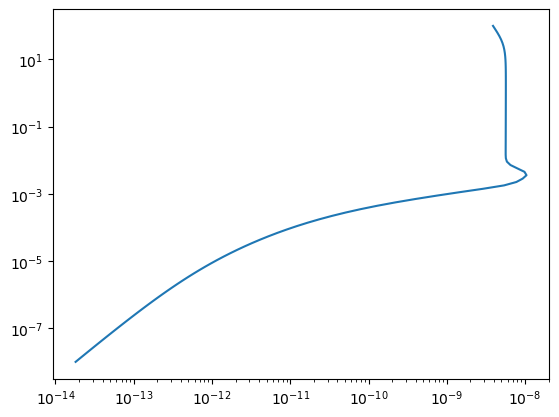

In [74]:
plt.plot(number_densities[:, index]/gas_number_density[:],pressures)
plt.xscale('log')
plt.yscale('log')